# Polinomial Regression

### Authors:
- Adrián Bedón
- Pablo Chasipanta
- José Miguel Merlo
- Dennis Ocaña
- Xavier Ramos

## 1. Polinomial Regression

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset from the URL
url = "https://raw.githubusercontent.com/Machine1314/natural_computing/main/data_regression.csv"
df = pd.read_csv(url)

print(df.head())

# Extract the independent variable (X) and dependent variable (y)
X = df[['xi']].values 
y = df['yi'].values

   i    xi     yi
0  1   6.6  -45.4
1  2  10.1 -176.6
2  3   8.9 -127.1
3  4   6.0  -31.1
4  5  13.3 -366.6


In [ ]:
# Create polynomial features (degree=2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create and fit the linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

# Evaluate the model using metrics like MSE and R-squared
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Sort the data points before plotting the predicted curve
sort_idx = np.argsort(X[:, 0])  # Get the indices to sort X
X_sorted = X[sort_idx]
y_pred_sorted = y_pred[sort_idx]

# Create a zoomed-out view
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Original plot (ax1) - same as before
ax1.scatter(X, y, color='blue', label='Actual Data')
ax1.plot(X_sorted, y_pred_sorted, color='red', label='Predicted Curve')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Quadratic Regression: Original View')
ax1.legend()

# Zoomed-out plot (ax2)
x_range = np.linspace(X.min() - 5, X.max() + 5, 100)  # Extended x-range
X_range_poly = poly.transform(x_range.reshape(-1, 1))  # Transform for prediction
y_range_pred = model.predict(X_range_poly)

ax2.scatter(X, y, color='blue', label='Actual Data')
ax2.plot(x_range, y_range_pred, color='red', label='Predicted Curve')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Quadratic Regression: Zoomed-Out View')
ax2.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## 2. Numerical Solution

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Machine1314/natural_computing/main/data_regression.csv')

df = (df - df.min()) / (df.max() - df.min())

In [ ]:
def gradient_descent_quadratic(a0, a1, a2, points, L):
    a0_gradient = 0
    a1_gradient = 0
    a2_gradient = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i]['xi']
        y = points.iloc[i]['yi']
        prediction = a0 + a1 * x + a2 * x**2
        error = y - prediction
        a0_gradient += -(2 / n) * error
        a1_gradient += -(2 / n) * x * error
        a2_gradient += -(2 / n) * x**2 * error
    a0 -= L * a0_gradient
    a1 -= L * a1_gradient
    a2 -= L * a2_gradient
    return a0, a1, a2

In [ ]:
def calculate_metrics(points, a0, a1, a2):
    y_true = points['yi']
    y_pred = a0 + a1 * points['xi'] + a2 * points['xi']**2
    mse = np.mean((y_true - y_pred)**2)
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return mse, r_squared

In [ ]:
learning_rates = [0.1, 0.5, 0.7]
steps = [10, 20, 50, 100, 500]

results = []

In [ ]:
fig = plt.figure(figsize=(20, 20), dpi=80)
for cont1, learn in enumerate(learning_rates):
    for cont2, step in enumerate(steps):
        a0, a1, a2 = 0, 0, 0
        L = learn
        epochs = step

        for _ in range(epochs):
            a0, a1, a2 = gradient_descent_quadratic(a0, a1, a2, df, L)

        linspace = np.linspace(df['xi'].min(), df['xi'].max(), 100)
        predictions = [a0 + a1 * x + a2 * x**2 for x in linspace]

        mse, r_squared = calculate_metrics(df, a0, a1, a2)
        results.append({'Learning Rate': learn, 'Steps': step, 'MSE': mse, 'R-squared': r_squared})

        ax1 = plt.subplot2grid((5, 5), (cont1, cont2))
        ax1.scatter(df['xi'], df['yi'], label='Data', color="black")
        ax1.title.set_text(f'LR: {learn}  S: {step}\nMSE: {mse:.4f}\nR²: {r_squared:.4f}')
        ax1.plot(linspace, predictions, color="red", label='Gradient descent')
        ax1.legend()

plt.tight_layout()
plt.show()

## 3. MLP

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [5]:
# Load the dataset from the URL
url = "https://raw.githubusercontent.com/Machine1314/natural_computing/main/data_regression.csv"
df = pd.read_csv(url)

# Extract the independent variable (X) and dependent variable (y)
X = df[['xi']].values 
y = df['yi'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(64, activation='relu'), 
    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
])

In [7]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=1000, batch_size=100, validation_split=0.1, verbose=0)

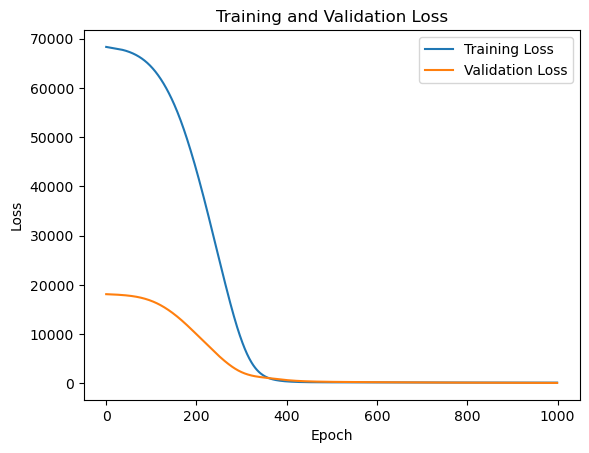

In [8]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [9]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Set: {mae}")

Mean Absolute Error on Test Set: 12.592373847961426


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


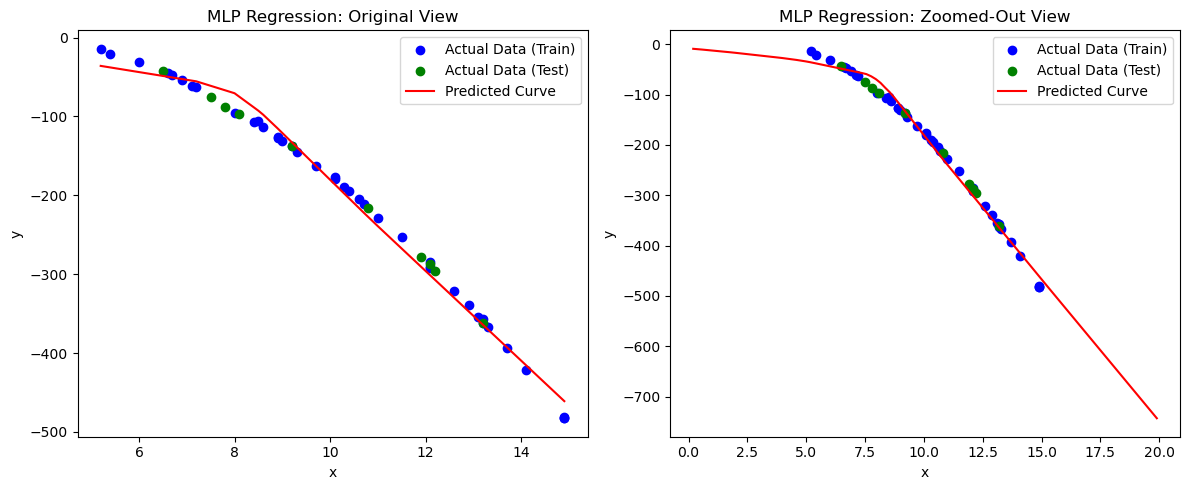

In [10]:
# Predict on the training data and sort for plotting
y_train_pred = model.predict(X_train)
# Sort the training data points for a smooth curve
sort_idx_train = np.argsort(scaler.inverse_transform(X_train)[:, 0])  
X_train_sorted = scaler.inverse_transform(X_train)[sort_idx_train]
y_train_pred_sorted = y_train_pred[sort_idx_train]

# Original view plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(scaler.inverse_transform(X_train), y_train, color='blue', label='Actual Data (Train)')
plt.scatter(scaler.inverse_transform(X_test), y_test, color='green', label='Actual Data (Test)')
# Plot the sorted predicted values for a smooth curve
plt.plot(X_train_sorted, y_train_pred_sorted, color='red', label='Predicted Curve')  
plt.xlabel('x')
plt.ylabel('y')
plt.title('MLP Regression: Original View')
plt.legend()

# Zoomed-out view plot
plt.subplot(1, 2, 2)  # Second subplot
x_range = np.linspace(X.min() - 5, X.max() + 5, 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)
y_range_pred = model.predict(x_range_scaled)

plt.scatter(scaler.inverse_transform(X_train), y_train, color='blue', label='Actual Data (Train)')
plt.scatter(scaler.inverse_transform(X_test), y_test, color='green', label='Actual Data (Test)')
plt.plot(x_range, y_range_pred, color='red', label='Predicted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('MLP Regression: Zoomed-Out View')
plt.legend()

plt.tight_layout()
plt.show()